In [3]:
import pandas as pd # already comes with matplotlib and NumPy
import glob
import os
import matplotlib

In [2]:
cwd = os.getcwd()
print(cwd)

/home/meelyn/Documents/cloud_development/python_data_plotting


In [4]:
# Concatenate all csv files in data directory

all_files = glob.glob(os.path.join('./data/', '*csv'))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

blu_data = pd.concat(li, axis=0, ignore_index=True)



In [7]:
# Attributes and Methods

# print(blu_data) # prints out a bit of the data frame

print(blu_data.head()) # only prints first few rows

print(type(blu_data)) # type is pandas.core.frame.DataFrame

print(blu_data.dtypes) # prints out variable types

# Useful ways to view DataFrame Objects in Python
## there are many ways to summarize and access the data stored in DataFrames, using attributes and methods provided by the DataFrame object.

## attributes - features of an object (columns, rows, variable type)
### shape will output the size (number of rows and columns) of an object
### access an attribute name by 'df_object.attribute' ex. blu_data.columns, returns an array/list
print(blu_data.columns)

### methods are like functions, but only work on particular kinds of objects
### head() is a function that returns the first few rows of dataframe
print(blu_data.head())

# Challenge DataFrames
print(blu_data.columns)
print(blu_data.shape) # returns variable names, number of rows and number of columns
# shape is a tuple - consists of a number of values separated by commas

# print(blu_data.head(15)) # prints first 15 rows, remember that python starts at 0

# print(blu_data.tail())

print(pd.unique(blu_data['RadioId'])) # gets unique number of radios

print(blu_data['VCC'].describe()) # provides basic summary statistics

#can extract specific metrics from describe method
print(blu_data['VCC'].mean)
print(blu_data['VCC'].median)
print(blu_data['VCC'].min)



   UsbPort  RadioId                 Time  TagRSSI     TagId   Sync  Product  \
0        3        2  2024-05-13 14:01:16      -84  0c5f5ced  46503        1   
1        3        4  2024-05-13 14:01:16      -82  0c5f5ced  46503        1   
2        3        1  2024-05-13 14:01:17      -82  0c5f5ced  16253        1   
3        3        1  2024-05-13 14:01:18      -85  0c5f5ced  45989        1   
4        3        1  2024-05-13 14:01:19      -86  0c5f5ced  31817        1   

   Revision    VCC   Temp   Payload  NodeId  
0       0.0  2.946  22.59  820bd308     NaN  
1       0.0  2.946  22.59  820bd308     NaN  
2       0.0  2.946  22.74  820be208     NaN  
3       0.0  2.946  22.64  820bd808     NaN  
4       0.0  2.946  22.67  820bdb08     NaN  
<class 'pandas.core.frame.DataFrame'>
UsbPort       int64
RadioId       int64
Time         object
TagRSSI       int64
TagId        object
Sync          int64
Product       int64
Revision    float64
VCC         float64
Temp        float64
Payload    

In [11]:
# summarize by one or more variables, use panadas .groupby method
grouped_data = blu_data.groupby(['UsbPort', 'RadioId'])
print(grouped_data.describe()) # need to use describe method to display summary stats from the groupby dataframe

                 TagRSSI                                                      \
                   count       mean        std   min   25%   50%   75%   max   
UsbPort RadioId                                                                
1       1        16967.0 -64.373490   8.964513 -87.0 -71.0 -64.0 -58.0 -34.0   
        2        19679.0 -62.954418  11.989184 -93.0 -72.0 -62.0 -54.0 -32.0   
        3        18463.0 -63.727401  11.081529 -88.0 -73.0 -62.0 -56.0 -36.0   
        4        19752.0 -71.832574   7.183764 -89.0 -78.0 -73.0 -67.0 -44.0   
3       1        14569.0 -73.966161   7.169222 -89.0 -80.0 -74.0 -69.0 -30.0   
        2        21288.0 -63.647689  12.640357 -90.0 -75.0 -61.0 -53.0 -28.0   
        3        20823.0 -72.142775   7.922727 -90.0 -79.0 -72.0 -66.0 -38.0   
        4        18907.0 -68.744380   9.465951 -90.0 -78.0 -67.0 -62.0 -38.0   
4       1        19983.0 -68.653906   8.438419 -91.0 -75.0 -68.0 -63.0 -34.0   
        2        21479.0 -63.016016  11.

In [13]:
# creating summary counts in pandas
blu_count = blu_data.groupby(['Time','UsbPort', 'RadioId'])['TagId'].count() # counts the number of unique tags for each usbport
print(blu_count)
print(blu_count.describe())

Time                 UsbPort  RadioId
2024-05-13 14:01:16  3        2          1
                              4          1
2024-05-13 14:01:17  3        1          1
                              3          2
                              4          1
                                        ..
2024-05-13 17:07:28  4        1          3
                              2          5
                              3          5
2024-05-13 17:07:29  4        2          3
                              3          5
Name: TagId, Length: 65197, dtype: int64
count    65197.000000
mean         3.598663
std          1.834979
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: TagId, dtype: float64


In [24]:
# count the number of rows for a specific TagId
bad_tag = blu_data.groupby('UsbPort')['TagId'].count()['0c5f5ced']

KeyError: '0c5f5ced'

<Axes: xlabel='UsbPort,RadioId'>

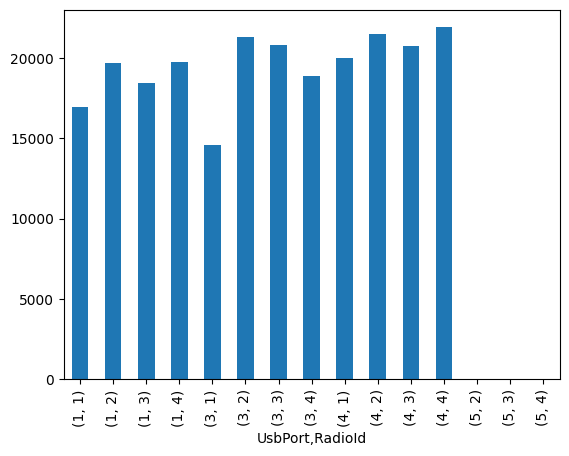

In [7]:
# Quick and Easy Plotting Data Using Pandas
## Make sure figures appear inline in Ipython Notebook
%matplotlib inline

# Create a quick bar chart
blu_count.plot(kind='bar')

In [38]:
total_count = blu_data.groupby('UsbPort')['TagId'].nunique()
print(type(total_count))
total_count.plot(kind='scatter')

<class 'pandas.core.series.Series'>


ValueError: plot kind scatter can only be used for data frames

In [21]:
# Time Series Graph
blu_time = pd.DataFrame()
print(blu_time)

blu_time.plot(x='Time', color=['UsbPort', 'RadioId'])

Empty DataFrame
Columns: []
Index: []


KeyError: 'Time'